In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
# import data

data=pd.read_csv(r'c:\Users\nimma\Downloads\Hospital ER_Data.csv' ,encoding_errors='ignore')

In [3]:
# show the first 10 rows data
data.head()

,Patient Id,Patient Admission Date,Patient First Inital,Patient Last Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM
0,145-39-5406,20-03-2024 08:47,H,Glasspool,M,69,White,NaN,False,10.0,39,0
1,316-34-3057,15-06-2024 11:29,X,Methuen,M,4,Native American/Alaska Native,NaN,True,NaN,27,0
2,897-46-3852,20-06-2024 09:13,P,Schubuser,F,56,African American,General Practice,True,9.0,55,0
3,358-31-9711,04-02-2024 22:34,U,Titcombe,F,24,Native American/Alaska Native,General Practice,True,8.0,31,0
4,289-26-0537,04-09-2024 17:48,Y,Gionettitti,M,5,African American,Orthopedics,False,NaN,10,0


In [4]:
# descriptive analysis 
data.describe()

,Patient Age,Patient Satisfaction Score,Patient Waittime,Patients CM
count,9216.000000,2517.000000,9216.000000,9216.000000
mean,39.855143,4.992054,35.259874,0.052083
std,22.755125,3.138043,14.735323,0.222207
min,1.000000,0.000000,10.000000,0.000000
25%,20.000000,2.000000,23.000000,0.000000
50%,39.000000,5.000000,35.000000,0.000000
75%,60.000000,8.000000,48.000000,0.000000
max,79.000000,10.000000,60.000000,1.000000


In [5]:
# information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient Id                  9216 non-null   object 
 1   Patient Admission Date      9216 non-null   object 
 2   Patient First Inital        9216 non-null   object 
 3   Patient Last Name           9216 non-null   object 
 4   Patient Gender              9216 non-null   object 
 5   Patient Age                 9216 non-null   int64  
 6   Patient Race                9216 non-null   object 
 7   Department Referral         3816 non-null   object 
 8   Patient Admission Flag      9216 non-null   bool   
 9   Patient Satisfaction Score  2517 non-null   float64
 10  Patient Waittime            9216 non-null   int64  
 11  Patients CM                 9216 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 801.1+ KB


In [6]:
# find the duplicates

data.duplicated().sum()

np.int64(0)

In [7]:
# find the null values

data.isnull().sum()

Patient Id                       0
Patient Admission Date           0
Patient First Inital             0
Patient Last Name                0
Patient Gender                   0
Patient Age                      0
Patient Race                     0
Department Referral           5400
Patient Admission Flag           0
Patient Satisfaction Score    6699
Patient Waittime                 0
Patients CM                      0
dtype: int64

In [8]:
# assume your column name is 'Patient Admission Date'
data['Patient Admission Date']=pd.to_datetime(data['Patient Admission Date'],dayfirst=True)

In [9]:
#create new column with only the date
data['patient_admission_date']=data['Patient Admission Date'].dt.date

In [10]:
#new column as text instead of date object:
data['patient_admission_date']=data['Patient Admission Date'].dt.strftime('%d-%m-%Y')

In [11]:
# new coumn as date
data['patient_admission_date']=data['Patient Admission Date'].dt.date

In [12]:
# add a new column as admision hour
data['admission_hour']=data['Patient Admission Date'].dt.hour

In [13]:
# create a column as a day name

data['admision_day_name']=data['Patient Admission Date'].dt.day_name()

data['admision_day_number']=data['Patient Admission Date'].dt.dayofweek

In [14]:
# create a column with patient full name
data['patient_full_name']=data['Patient First Inital'] + ' ' +data['Patient Last Name']


In [15]:
# patien gender replace with M replace male F replace Female
data['Patient Gender']=data['Patient Gender'].map({'M':'Male','F':'Female','NC':'Not Conformed'})

In [16]:
# rename the column name
data=data.rename(columns={'Patient Id': 'patient_id',
                         'Patient Admission Date': 'patient_admission_date_hour',
                         'Patient Gender' : 'patient_gender',
                         'Patient Age' : 'patient_age',
                         'Patient Race': 'patient_race',
                         'Department Referral': 'department_referral',
                         'Patient Admission Flag' :'patient_admission_flag',
                         'Patient Satisfaction Score' : 'patient_satisfaction_score',
                         'Patient Waittime': 'patient_waittime',
                         'Patients CM' :'patients_CM'})

In [17]:
# remove the unnenecray column

data=data.drop(columns=['Patient First Inital','Patient Last Name'])

In [18]:
# create a new column patient admission status
data['patient_admission_status']=np.where(data['patient_admission_flag'] == True,'Admitted','Not Admitted')

In [19]:
#  create a column in patient age group

conditions= [
    data['patient_age']>100,
    data['patient_age']>90,
    data['patient_age']>80,
    data['patient_age']>70,
    data['patient_age']>60,
    data['patient_age']>50,
    data['patient_age']>4,
    data['patient_age']>30,
    data['patient_age']>20,
    data['patient_age']>10,
]

choices=[
    '100+',
    '90-99',
    '80-89',
    '70-79',
    '60-69',
    '50-59',
    '40-49',
    '30-39',
    '20-29',
    '10-19',
]   

data['patient_age_group']=np.select(conditions,choices,default='0-9')



In [20]:
data['Admission_Hour'] = pd.to_numeric(data['admission_hour'], errors='coerce')

conditions = [
    data['admission_hour'] <= 2,
    data['admission_hour'] <= 4,
    data['admission_hour'] <= 6,
    data['admission_hour'] <= 8,
    data['admission_hour'] <= 10,
    data['admission_hour'] <= 12,
    data['admission_hour'] <= 14,
    data['admission_hour'] <= 16,
    data['admission_hour'] <= 18,
    data['admission_hour'] <= 20,
    data['admission_hour'] <= 22,
    data['admission_hour'] <= 24
]

choices = [
    '00-02',
    '03-04',
    '05-06',
    '07-08',
    '09-10',
    '11-12',
    '13-14',
    '15-16',
    '17-18',
    '19-20',
    '21-22',
    '23-24'
]

data['wait_time_interval'] = np.select(
    conditions,
    choices,
    default='Above 24'
)

In [21]:
# create a column wait time status

data['wait_time_status']=np.where(data['patient_waittime']>=30,'Within Target','Target Missed')

In [22]:
data.head()

,patient_id,patient_admission_date_hour,patient_gender,patient_age,patient_race,department_referral,patient_admission_flag,patient_satisfaction_score,patient_waittime,patients_CM,patient_admission_date,admission_hour,admision_day_name,admision_day_number,patient_full_name,patient_admission_status,patient_age_group,Admission_Hour,wait_time_interval,wait_time_status
0,145-39-5406,2024-03-20 08:47:00,Male,69,White,NaN,False,10.0,39,0,2024-03-20,8,Wednesday,2,H Glasspool,Not Admitted,60-69,8,07-08,Within Target
1,316-34-3057,2024-06-15 11:29:00,Male,4,Native American/Alaska Native,NaN,True,NaN,27,0,2024-06-15,11,Saturday,5,X Methuen,Admitted,0-9,11,11-12,Target Missed
2,897-46-3852,2024-06-20 09:13:00,Female,56,African American,General Practice,True,9.0,55,0,2024-06-20,9,Thursday,3,P Schubuser,Admitted,50-59,9,09-10,Within Target
3,358-31-9711,2024-02-04 22:34:00,Female,24,Native American/Alaska Native,General Practice,True,8.0,31,0,2024-02-04,22,Sunday,6,U Titcombe,Admitted,40-49,22,21-22,Within Target
4,289-26-0537,2024-09-04 17:48:00,Male,5,African American,Orthopedics,False,NaN,10,0,2024-09-04,17,Wednesday,2,Y Gionettitti,Not Admitted,40-49,17,17-18,Target Missed


In [23]:
# number of patients

number_of_patients=data['patient_id'].count()

print(number_of_patients)


9216


In [24]:
# average wait time

avg_wait_time=data['patient_waittime'].mean()

avg_wait_time_formated=f"{avg_wait_time:.1f} Min"

print(avg_wait_time_formated)

35.3 Min


In [25]:
# patient satisfaction score

avg_patient_satisfaction_score=data['patient_satisfaction_score'].mean()

print(avg_patient_satisfaction_score)

4.992054032578467


In [26]:
# no of patients are refered

number_of_patients_refered=data.loc[
    data['department_referral'] !='None',
    'department_referral'].count()

print(number_of_patients_refered)

3816


EDA(Exploratary data analysis)

Text(0.5, 1.0, 'No of patients by patient race')

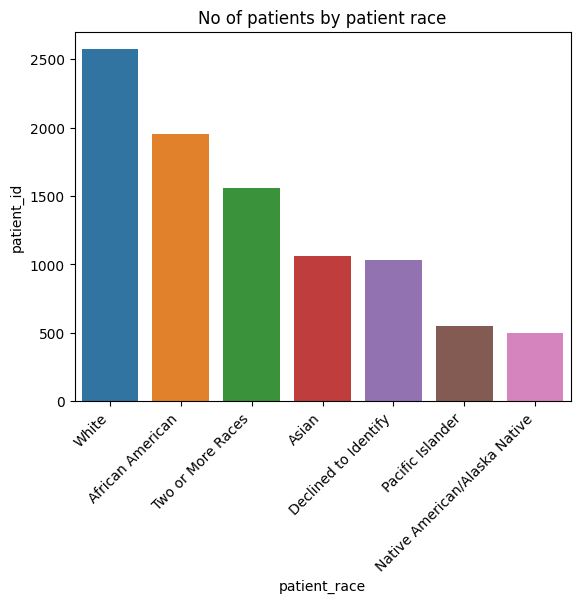

In [27]:
# no of patients by patient race



no_patient_by_patient_race=data.groupby(['patient_race'],as_index=False)['patient_id'].count().sort_values(by='patient_id',ascending=False)

sns.barplot(data=no_patient_by_patient_race,x='patient_race',y='patient_id',hue='patient_race')
plt.xticks(rotation=45,ha='right')
plt.title('No of patients by patient race')

Text(0.5, 1.0, 'Number of patients by age group')

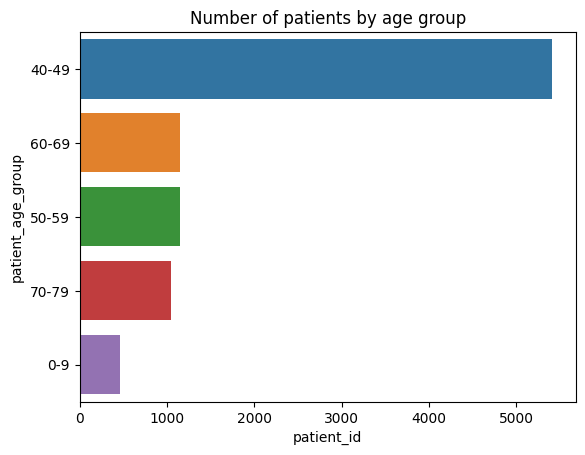

In [28]:
# no of patiets by age group

age_group=data.groupby(['patient_age_group'],as_index=False)['patient_id'].count().sort_values(by='patient_id',ascending=False)


sns.barplot(data=age_group,x='patient_id',y='patient_age_group',hue='patient_age_group')
plt.title('Number of patients by age group')

Text(0.5, 1.0, 'No of patients by department refferal')

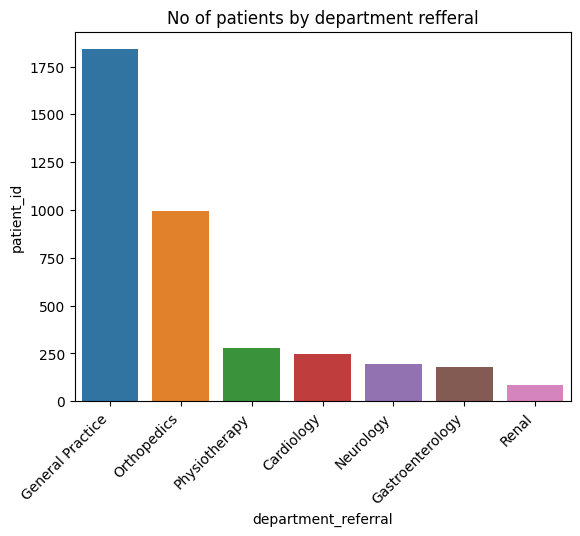

In [29]:
# no of patients by department referal

department_referal=data.groupby(['department_referral'],as_index=False)['patient_id'].count().sort_values(by='patient_id',ascending=False)

sns.barplot(data=department_referal,x='department_referral',y='patient_id',hue='department_referral')
plt.xticks(rotation=45,ha='right')
plt.title('No of patients by department refferal')

Text(0.5, 1.0, 'No of patients by hour')

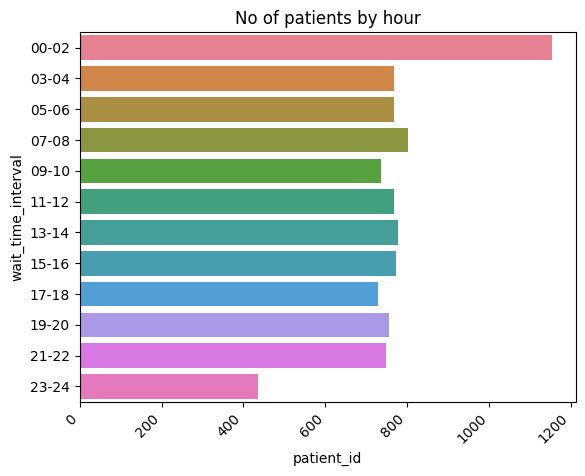

In [30]:
# no of patients by hour

no_of_patients_by_daily=data.groupby(['wait_time_interval'],as_index=False)['patient_id'].count()


sns.barplot(data=no_of_patients_by_daily,x='patient_id',y='wait_time_interval',hue='wait_time_interval')
plt.xticks(rotation=45,ha='right')
plt.title('No of patients by hour')

Text(0.5, 1.0, 'No of patients by daily')

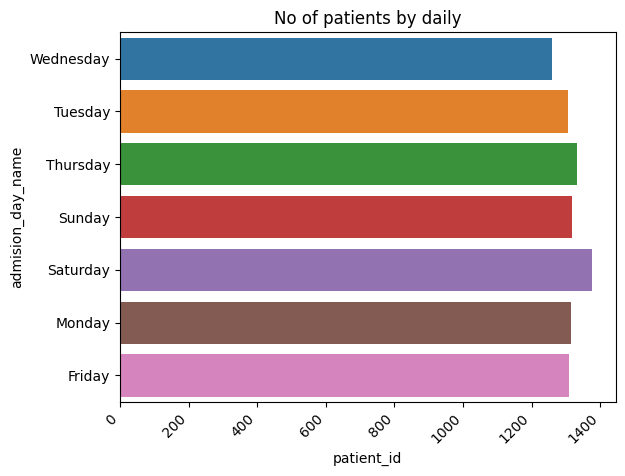

In [31]:
no_of_patients_by_daily=data.groupby(['admision_day_name'],as_index=False)['patient_id'].count().sort_values(by='admision_day_name',ascending=False)


sns.barplot(data=no_of_patients_by_daily,x='patient_id',y='admision_day_name',hue='admision_day_name')
plt.xticks(rotation=45,ha='right')
plt.title('No of patients by daily')

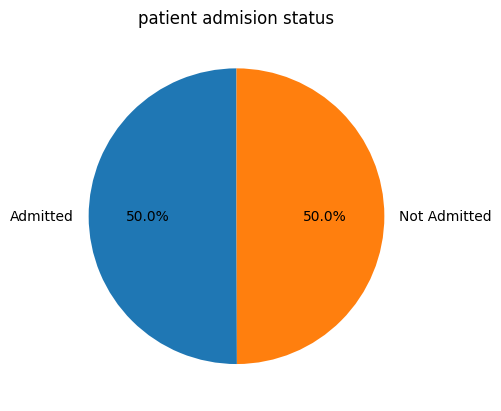

In [32]:
# patient admission status

status_count=data['patient_admission_status'].value_counts()

plt.Figure()
plt.pie(status_count.values,labels=status_count.index,autopct='%1.1f%%',startangle=90)
plt.title('patient admision status')
plt.show()

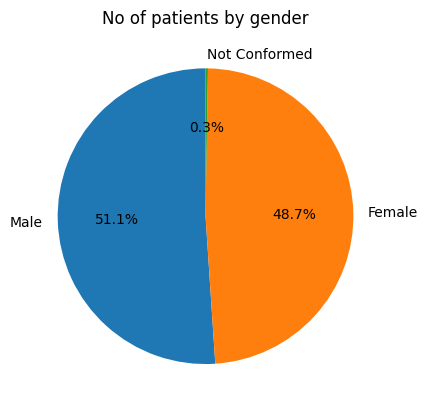

In [33]:
# no of patients by gender
gender_count=data['patient_gender'].value_counts()

plt.Figure()

plt.pie(gender_count.values,labels=gender_count.index,autopct='%1.1f%%',startangle=90)
plt.title('No of patients by gender')
plt.show()

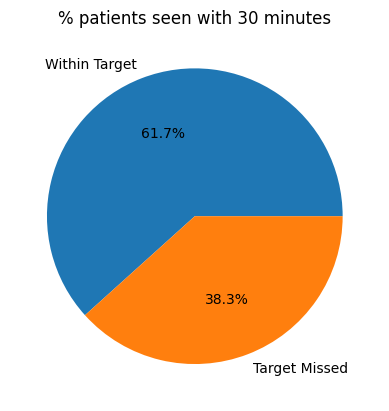

In [34]:
waittime_count=data['wait_time_status'].value_counts()

plt.Figure()

plt.pie(waittime_count.values,labels=waittime_count.index,autopct='%1.1f%%')
plt.title('% patients seen with 30 minutes')
plt.show()

In [35]:
from sqlalchemy import create_engine

# step 1 connect to postgress

username="postgres"
password="Manasa"
host="localhost"
port="5432"
database="Hospital ER"

#engine=create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")
engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

table_name="hospital_data"


data.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"data suceffully loaded into table '{table_name}' in database '{database}'")

data suceffully loaded into table 'hospital_data' in database 'Hospital ER'
